<a href="https://colab.research.google.com/github/moniker0/github-credit-card-fraud-detection/blob/main/Copy_of_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection**

Credit card companies should be able to recognize fraudulent credit card transactions so that their customers are not charged for items that they did not purchase.

In [32]:
# import dependencies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
# import credit card data into a pandas dataframe

credit_card_data = pd.read_csv('/content/creditcard.csv')

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Dataset Information**

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data is not available. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
# dataset info

credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# checking number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [6]:
# distribution of legit vs fraudulant transactions.

class_counts = credit_card_data['Class'].value_counts()
class_counts

,count
Class,
0,284315
1,492


Text(0, 0.5, 'Frequency')

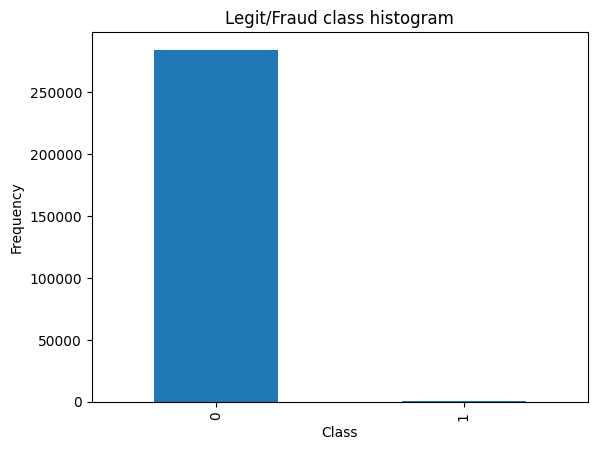

In [7]:
class_counts.plot(kind='bar')
plt.title("Legit/Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

**Imbalanced Dataset**

The above output suggests that the data is highly
skewed/imbalanced.

*   Legit: 284315
*   Fraud: 492

Fraud cases are <0.2% of total i.e. 492/284807*100 = 0.172%)

## **Creating a baseline model with imbalanced data using a logistic regression model**

In [8]:
# Normalize the Time and Amount variables as they are not PCA transformed
scaler = StandardScaler()
credit_card_data['N_Time'] = scaler.fit_transform(credit_card_data[['Time']])
credit_card_data['N_Amount'] = scaler.fit_transform(credit_card_data[['Amount']])

In [9]:
# load X and y variables
X = credit_card_data.drop(columns=['Class','Time', 'Amount'], axis = 1)
y = credit_card_data['Class']

In [10]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
# Initialize and train the Logistic Regression model
# Use class weights to handle imbalance
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [12]:
# predict probabilities for the positive(Fraud) class
y_scores = model.predict_proba(X_test)[:, 1]

Since we are dealing with imbalanced data, we will be using the Area Under the Precision-Recall Curve (AUPRC) for measuring model performance as compared to AUC of ROC curve as AUPRC focuses on minority class.

In [13]:
# caluclate Precision-Recall Curve and Area Under Precision-Recall Curve(AUPRC)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
auprc = auc(recall, precision)


In [14]:
# Print AUPRC
print(f"Area Under the Precision-Recall Curve (AUPRC): {auprc:.4f}")

Area Under the Precision-Recall Curve (AUPRC): 0.7406


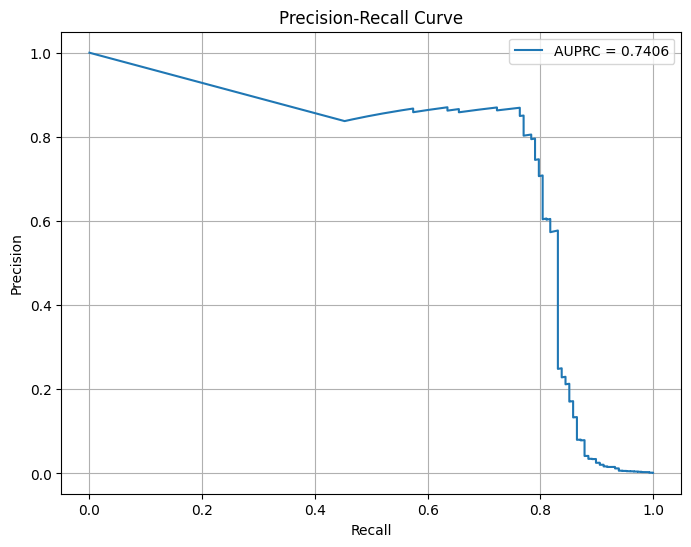

In [16]:
# Step 6: Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUPRC = {auprc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

AUPRC of 0.7406 indicates a good performance for the model.
The AUPRC curve indicates that as the recall increases, the precision of detecting fraudulent cases decreases i.e. more False Positives. So the model does a good job of identifying fraudulent transactions but with a lot of incorrectly flagged non-fraud cases. Such cases might have to be reviewed and investigated manually which might be costly.

Since catching fraud is quite critical to business, favouring high recall here at the cost of low precision.


In [17]:
# Step 7: Optional - Evaluate the model using classification metrics
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



The F1 score (balance of precision and recall) is nearly perfect for non-fraud transactions i.e. 0.99.
However, for the fraud class, the low F1-score of 0.12 indicates poor balance between precision and recall for fraud detection.
Overall F1 score of 0.56 balances precision and recall across both classes. This low score reflects poor performance for the minority (fraud) class.
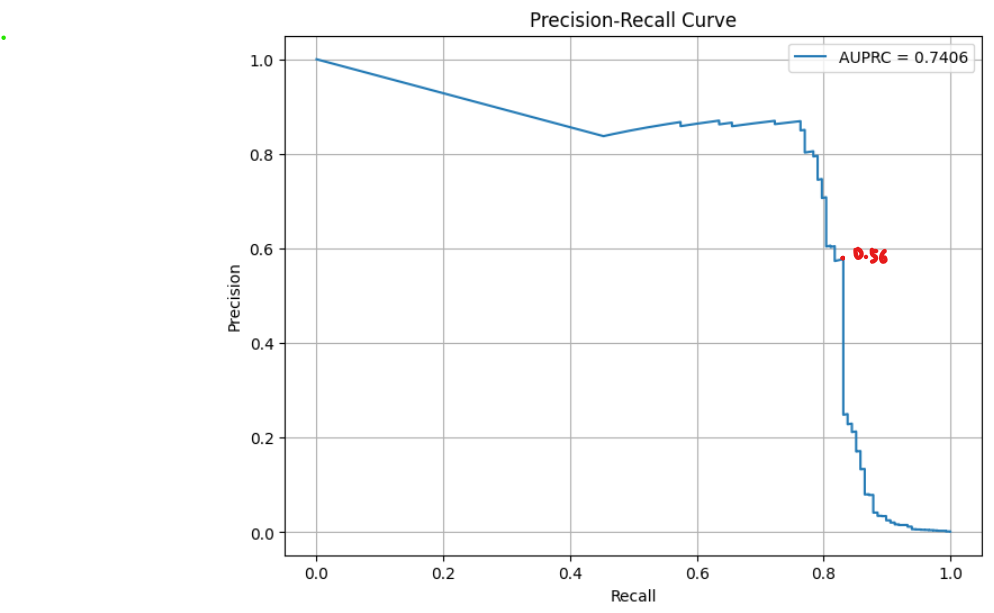

*Key insights from this model*:

*   Good Recall for Fraud (Class 1):

The model successfully identifies 88% of fraudulent transactions, which is a critical aspect in fraud detection since missing fraud can have serious consequences.

*   Poor Precision for Fraud (Class 1):

Only 7% of predicted fraud transactions are actually fraud. This indicates a high number of false positives, which can cause operational inefficiencies (e.g., manually investigating many non-fraudulent transactions).

*   Misleading Accuracy:

The high accuracy of 98% is driven by the majority class (non-fraud), not by the model’s ability to detect fraud effectively.

# **Addressing Class Imbalance**

Class imbalance causes models to be biased towards the majority class (non-fraud) which may lead to poor detection of the minority class (fraud).

To improve the model performance for better fraud prediction, one of the ways is to try better sampling techniques like under-sampling non-fraud cases OR over-sampling fraud cases OR using SMOTE, etc.  

With a balanced dataset, we can achieve better minority class detection, reduce bias towards majority class and improve the F1 score / Precision-Recall Tradeoff.

**Undersampling Majority Class**

In [59]:
# Define the undersampler
undersampler = RandomUnderSampler(random_state=42)

In [60]:
# Apply undersampling to the training data
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [61]:
# Check new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 344, 1: 344}


In [62]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [63]:
# predict probabilities on test set
y_scores = model.predict(X_test)

In [64]:
# Evaluate performance
print(classification_report(y_test, y_scores))
print(confusion_matrix(y_test, y_scores))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

[[83379  1916]
 [   17   131]]


In [67]:
# Predicted probabilities for fraud
y_prob = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.2f}")

Precision-Recall AUC: 0.67


*Key insights from this model*

* High Recall for Fraud class:

The model identifies 89% of actual fraud cases, which is a significant improvement.

* Improved Precision for Fraud (Class 1):

Only 6% of transactions flagged as fraud are truly fraudulent.
High false positive rate (1,916 non-fraudulent transactions flagged as fraud) can lead to inefficiencies in fraud investigation.

* Excellent Non-Fraud Classification:

Precision, recall, and F1-score for non-fraud transactions are near perfect.

* Precision-Recall is moderately good

With AUC of 0.67 on average this model achieves a balance between precision and recall that is moderately good.


**SMOTE (Synthetic Minority Oversampling Technique)**

Create synthetic samples for the minority class by interpolating between existing samples. We will be using SMOTE rather than RandomOverSampler as it generates synthetic examples rather than duplicating existing ones, reducing the risk of overfitting.

In [68]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

In [69]:
# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [70]:
# Check new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 199020, 1: 199020}


In [77]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [78]:
# predict probabilities on test set
y_scores = model.predict(X_test)

In [79]:
# Evaluate performance
print(classification_report(y_test, y_scores))
print(confusion_matrix(y_test, y_scores))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

[[83376  1919]
 [   18   130]]


*Key insights from this model*

* Improved Precision for Fraud class

Precision has increased from 0.06 (before SMOTE) to 0.86, significantly reducing false positives.
This improvement makes the model more reliable for fraud prediction, as flagged cases are much more likely to be true fraud.

* Perfect Performance for Non-Fraud class:

The model performs almost flawlessly for non-fraudulent transactions, with high precision and recall.

* Balanced F1-Score for Fraud class:

An F1-Score of 0.72 shows a good balance between precision and recall for fraud detection.

* Model Weaknesses

Recall dropped from 0.89 (before SMOTE) to 0.61, meaning more fraud cases are missed. This could be problematic in scenarios where catching fraud is critical.
While SMOTE improves the model’s learning on fraud cases, the test set remains imbalanced. This limits the model's ability to achieve high recall for fraud.

In [76]:
# Predicted probabilities for fraud
y_prob = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.2f}")

Precision-Recall AUC: 0.71
